# Intro to Convolutions

## Set up

In [1]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.linalg import norm
from PIL import Image
from matplotlib import pyplot as plt, rcParams, rc
from scipy.ndimage import imread
from skimage.measure import block_reduce
import pickle as pickle
from scipy.ndimage.filters import correlate, convolve
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 6
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def plots(ims, interp=False, titles=None):
    ims=np.array(ims)
    mn,mx=ims.min(),ims.max()
    f = plt.figure(figsize=(12,24))
    for i in range(len(ims)):
        sp=f.add_subplot(1, len(ims), i+1)
        if not titles is None: sp.set_title(titles[i], fontsize=18)
        plt.imshow(ims[i], interpolation=None if interp else 'none', vmin=mn,vmax=mx)

def plot(im, interp=False):
    f = plt.figure(figsize=(3,6), frameon=True)
    # plt.show(im)
    plt.imshow(im, interpolation=None if interp else 'none')

plt.gray()
plt.close()

## MNIST Data

In [3]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

/Users/shun/.pyenv/versions/3.6.1/envs/numerical-linear-algebra/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/Users/shun/.pyenv/versions/3.6.1/envs/numerical-linear-algebra/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [4]:
mnist.keys()

dict_keys(['DESCR', 'COL_NAMES', 'target', 'data'])

In [5]:
mnist['data'].shape, mnist['target'].shape

((70000, 784), (70000,))

In [6]:
images = np.reshape(mnist['data'], (70000, 28, 28))
labels = mnist['target'].astype(int)
n=len(images)
images.shape, labels.shape

((70000, 28, 28), (70000,))

In [7]:
images = images/255  # So that each pixel value is between 0 and 1

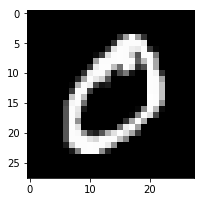

In [8]:
plot(images[0])

In [9]:
images[0].shape

(28, 28)

In [10]:
labels[0]

0

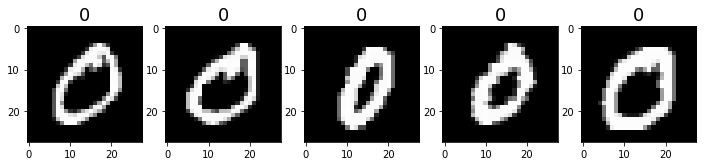

In [11]:
plots(images[:5], titles=labels[:5])

we can zoom in on part of the image

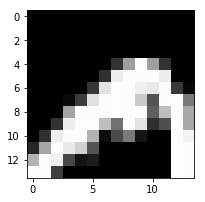

In [12]:
plot(images[0,0:14, 8:22])

## Edge Detection

We will look at how to create an Edge detector:

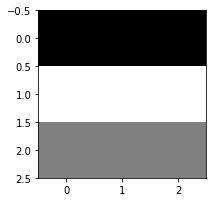

In [13]:
top=[[-1,-1,-1],
     [ 1, 1, 1],
     [ 0, 0, 0]]

plot(top)

In [14]:
dims = np.index_exp[10:28:1,3:13]
images[0][dims]

array([[0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.1882, 0.9333, 0.9882, 0.9882],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.149 , 0.6471, 0.9922, 0.9137, 0.8157],
       [0.    , 0.    , 0.    , 0.    , 0.0275, 0.698 , 0.9882, 0.9412, 0.2784, 0.0745],
       [0.    , 0.    , 0.    , 0.    , 0.2235, 0.9882, 0.9882, 0.2471, 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.7765, 0.9922, 0.7451, 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.298 , 0.9647, 0.9882, 0.4392, 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.3333, 0.9882, 0.902 , 0.098 , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.3333, 0.9882, 0.8745, 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.3333, 0.9882, 0.5686, 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.3373, 0.9922, 0.8824, 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.3333, 0.9882, 0.9765, 0.5725, 0.1882, 0.1137, 0.3333],
       [0.    , 0.   

In [15]:
corrtop = correlate(images[0], top)

In [16]:
corrtop[dims]

array([[ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.1882,  0.9216,  0.9765,  0.7843, -0.2392],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.149 ,  0.6078,  0.6667,  0.4431, -0.1882, -0.6196],
       [ 0.    ,  0.    ,  0.    ,  0.0275,  0.5765,  0.9176,  0.8392, -0.3451, -1.4275, -1.5961],
       [ 0.    ,  0.    ,  0.    ,  0.1961,  0.4863,  0.4863, -0.4039, -0.9725, -1.0471, -0.4627],
       [ 0.    ,  0.    ,  0.    ,  0.5529,  0.5569,  0.3137, -0.4863, -0.4902, -0.2471,  0.    ],
       [ 0.    ,  0.    ,  0.298 ,  0.4863,  0.4824, -0.1216, -0.3098, -0.3059,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.0353,  0.0588, -0.0275, -0.4039, -0.4275, -0.3412,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    , -0.0275, -0.1255, -0.1255, -0.098 ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    , -0.3059, -0.3059, -0.3059,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.0039,  0.0078,  0.3216,  0.3176,  0.3137,  0.    ,  0.    ,  0.    ],
       [ 0

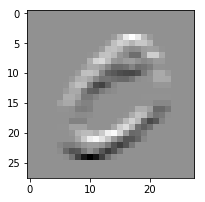

In [17]:
plot(corrtop)

In [18]:
np.rot90(top, 1)

array([[-1,  1,  0],
       [-1,  1,  0],
       [-1,  1,  0]])

True

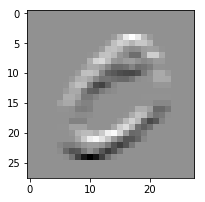

In [19]:
convtop = convolve(images[0], np.rot90(top,2))
plot(convtop)
np.allclose(convtop, corrtop)

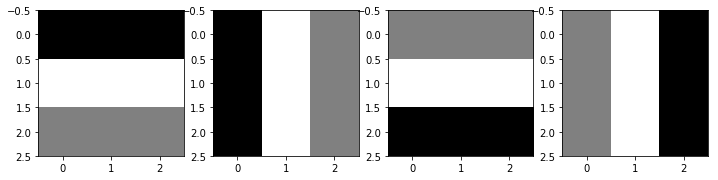

In [20]:
straights=[np.rot90(top,i) for i in range(4)]
plots(straights)

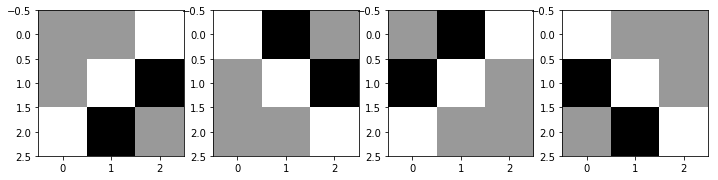

In [21]:
br=[[ 0, 0, 1],
    [ 0, 1,-1.5],
    [ 1,-1.5, 0]]

diags = [np.rot90(br,i) for i in range(4)]
plots(diags)

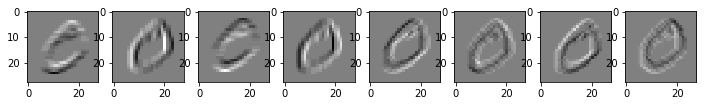

In [22]:
rots = straights + diags
corrs = [correlate(images[0], rot) for rot in rots]
plots(corrs)

In [23]:
eights=[images[i] for i in range(n) if labels[i]==8]
ones=[images[i] for i in range(n) if labels[i]==1]

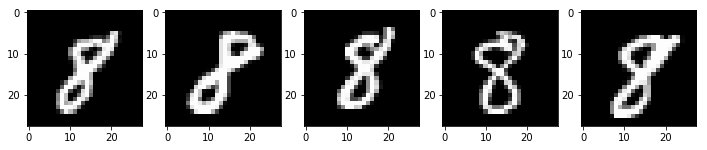

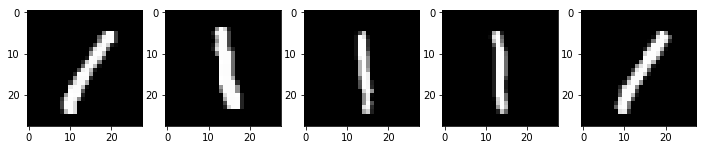

In [24]:
plots(eights[:5])
plots(ones[:5])

In [78]:
def normalize(arr): return (arr-arr.mean())/arr.std()

In [79]:
filts8 = np.array([ims.mean(axis=0) for ims in pool8])
filts8 = normalize(filts8)

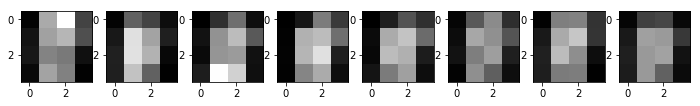

In [80]:
plots(filts8)

In [30]:
pool1 = [np.array([pool(correlate(im, rot)) for im in ones]) for rot in rots]
filts1 = np.array([ims.mean(axis=0) for ims in pool1])
filts1 = normalize(filts1)

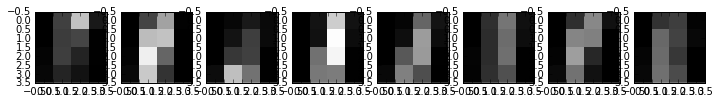

In [31]:
plots(filts1)

In [32]:
def pool_corr(im): return np.array([pool(correlate(im, rot)) for rot in rots])

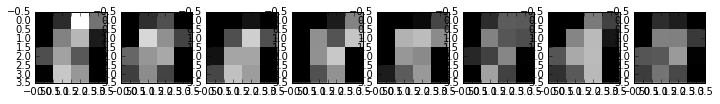

In [33]:
plots(pool_corr(eights[0]))

In [35]:
def sse(a,b): return ((a-b)**2).sum()
def is8_n2(im): return 1 if sse(pool_corr(im),filts1) > sse(pool_corr(im),filts8) else 0

In [36]:
sse(pool_corr(eights[0]), filts8), sse(pool_corr(eights[0]), filts1)

(126.77776, 181.26105)

In [37]:
[np.array([is8_n2(im) for im in ims]).sum() for ims in [eights,ones]]

[5223, 287]

In [38]:
[np.array([(1-is8_n2(im)) for im in ims]).sum() for ims in [eights,ones]]

[166, 5892]

In [ ]:
def n1(a,b): return (np.fabs(a-b)).sum()
def is8_n1(im): return 1 if n1(pool_corr(im),filts1) > n1(pool_corr(im),filts8) else 0

In [ ]:
[np.array([is8_n1(im) for im in ims]).sum() for ims in [eights,ones]]

In [ ]:
[np.array([(1-is8_n1(im)) for im in ims]).sum() for ims in [eights,ones]]